<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Using_Pytorch_to_fight_cancer_(III).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Early Stopping

Early stopping is a technique used in machine learning model training to halt training before the model begins to overfit the training data. This is done by monitoring a metric of interest on the validation set and stopping training when the metric ceases to improve for a certain number of consecutive epochs.

You can use the Python standard library os to create a directory named "train" in the current directory and then save the trained models (pth) in that directory. Here's an example of how to do it:


In [ ]:
import torchvision.models as models

# Current directory
current_dir = os.getcwd()
print(current_dir)

# Path to the "train" directory
train_dir = os.path.join(current_dir, 'train')

# Check if the "train" directory already exists
if not os.path.exists(train_dir):
    # Create the "train" directory if it doesn't exist
    os.makedirs(train_dir)

# Save the trained model in the "train" directory
model_path = os.path.join(train_dir, 'myCNN.pth')
torch.save(model.state_dict(), model_path)

/content/datasets


### [Checkpoints and Early Stopping](https://machinelearningmastery.com/managing-a-pytorch-training-process-with-checkpoints-and-early-stopping/)

Application checkpointing is a fault tolerance technique. In this approach, a snapshot of the state of the system is taken in case of system failure. If there is a problem, you can resume from the snapshot. The checkpoint may be used directly or as the starting point for a new run, picking up where it left off. When training deep learning models, the checkpoint captures the weights of the model. These weights can be used to make predictions as-is or as the basis for ongoing training.

PyTorch does not provide any function for checkpointing but it has functions for retrieving and restoring weights of a model. So you can implement checkpointing logic with them. Let’s make a checkpoint and a resume function, which simply save weights from a model and load them back:

In [ ]:
def checkpoint(model, filename):
  model_path = os.path.join(train_dir, filename)
  torch.save(model.state_dict(), model_path)

def resume(model, filename):
  model.load_state_dict(torch.load(filename))


If you want to add checkpoints to the training loop, you can do it at the end of the outer for-loop, where the model validation with the test set is done.

You will see a number of files created in your working directory. This code is going to checkpoint the model fro each epoch. Each of these file is a ZIP file with the pickled model weight. Nothing forbid you to checkpoint inside the inner for-loop but due to the overhead it incurs, it is not a good idea to checkpoint too frequent.

In [ ]:
# Create a instance from your model
model = myCNN().to(device)

# Load the state to your new instance
model.load_state_dict(torch.load("myCNN.pth"))


<All keys matched successfully>

In [ ]:
epochs = 10

loss_train_history = []
accuracy_train_history = []
loss_test_history = []
accuracy_test_history = []


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_test= test(test_dataloader, model, criterion)
  loss_test_history.append(loss_test)
  accuracy_test_history.append(acc_test)
  checkpoint(model, f"epoch-{epoch}.pth")

# save metrics in a .CSV file.
with open('metrics_myCNN_2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
    for epoch, (train_loss, train_accuracy, test_loss, test_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_test_history, accuracy_test_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, test_loss, test_accuracy])


print("Done!. Finished Training")

Training:


  0%|          | 0/85 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
[1/10 epochs,  2700/ 2700 data]:  99%|█████████▉| 84/85 [00:09<00:00, 11.90it/s, Accuracy=82.3%, Training_Loss=0.382]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
[1/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.26it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[2/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.43it/s, Accuracy=82.3%, Training_Loss=0.384]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[3/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.52it/s, Accuracy=82.3%, Training_Loss=0.384]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[4/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.79it/s, Accuracy=82.3%, Training_Loss=0.384]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[5/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:11<00:00,  7.40it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[6/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.26it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[7/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:14<00:00,  6.06it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[8/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.38it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[9/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.07it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[10/10 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.53it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Done!. Finished Training


The question is of all model which is the best one? It will be studied forward.

You can use a fault tolerance technique where training resumes from a particular epoch. That is, if the training loop was interrupted in the middle of epoch 3 so the last checkpoint is from epoch 2, setting start_epoch = 3 above will do.

This action cannot be simulated in jupyter notebook because we cannot  halt the cell, anyway the code could be this.
```python
epochs = 10

loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, f"epoch-{resume_epoch}.pth")

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_test= test(test_dataloader, model, criterion)
  loss_test_history.append(loss_test)
  accuracy_test_history.append(acc_test)
  checkpoint(model, f"epoch-{epoch}.pth")

# save metrics in a .CSV file.
with open('metrics_myCNN_3.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
    for epoch, (train_loss, train_accuracy, test_loss, test_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history, loss_test_history, accuracy_test_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy, test_loss, test_accuracy])

print("Done!. Finished Training")
```



Sometimes, there are states outside of the model and you may want to checkpoint it as well. One particular example is the optimizer, which in cases like Adam, there are dynamically adjusted momentum. If you restarted your training loop, you may want to restore the momentum at the optimizer as well. It is not difficult to do. The idea is to make your `checkpoint()` function more complicated thanks to `torch.save()` and `torch.load()` function are backed by `pickle`, so you can use it with a list or dict container.

In [ ]:
def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])


In [ ]:
epochs = 5

loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, f"epoch-{resume_epoch}.pth")

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_val= test(test_dataloader, model, criterion)
  loss_test_history.append(loss_test)
  accuracy_test_history.append(acc_test)
  checkpoint(model, f"epoch-{epoch}.pth")
print("Done!. Finished Training")

Training:


[1/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.74it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[2/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.70it/s, Accuracy=82.3%, Training_Loss=0.384]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[3/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.78it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[4/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.31it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[5/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.11it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Done!. Finished Training


Checkpointing is not only for fault tolerance. You can also use it to keep your best model. How to define what is the best is `subjective` but considering the score from the test set is a sensible method. Let’s say to keep only the best model ever found.

The variable `best_accuracy` is to keep track on the highest validation accuracy (`val_acc`) obtained so far, which is in a percentage range of 0 to 100. Whenever a higher accuracy is observed, the model is checkpointed to the file `best_model.pth`. The best model is restored after the entire training loop, via the `resume()` function which was created before.

Afterward, you can make predictions with the model on unseen data. Beware that, if you’re using a different metric for checkpointing, e.g., the cross entropy loss, the better model should come with a lower cross entropy. Thus you should keep track on the lowest cross entropy obtained.


The training loop can be modified as follows:

In [ ]:
epochs = 5

best_accuracy = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

start_epoch = 0
if start_epoch > 0:
    resume_epoch = start_epoch - 1
    resume(model, f"epoch-{resume_epoch}.pth")

for epoch in range(start_epoch, epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_test= test(test_dataloader, model, criterion)
  loss_val_history.append(loss_test)
  accuracy_val_history.append(acc_test)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    checkpoint(model, f"best_model.pth")
    print(f'best model in epoch:{epoch+1}')
print("Done!. Finished Training")

Training:


[1/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.10it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

best model in epoch:1
Training:


[2/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.38it/s, Accuracy=82.3%, Training_Loss=0.381]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[3/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.35it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[4/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:10<00:00,  8.14it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[5/5 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.02it/s, Accuracy=82.3%, Training_Loss=0.385]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Done!. Finished Training


You can also checkpoint the model per epoch unconditionally together with the best model checkpointing, as you are free to create multiple checkpoint files. Since the code above is the find the best model and make a copy of it, you may usually see a further optimization to the training loop by stopping it early if the hope to see model improvement is slim. This is the early stopping technique that can save time in training.

The code above validates the model with test set at the end of each epoch and keeps the best model found into a checkpoint file. The simplest strategy for early stopping is to set up a threshold of
 epochs. If you didn’t see the model improved over the last
 epochs, you terminate the training loop in the middle. This can be implemented as follows:

In [ ]:
epochs = 50

early_stop_thresh = 5
best_accuracy = -1
best_epoch = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_test,acc_test= test(test_dataloader, model, criterion)
  loss_test_history.append(loss_test)
  accuracy_test_history.append(acc_test)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, f"best_model.pth")
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")

Training:


[1/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:07<00:00, 10.76it/s, Accuracy=82.3%, Training_Loss=0.384]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

best model in epoch=1 with Accuracy=78.0%
Training:


[2/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.72it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[3/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.16it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[4/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  8.98it/s, Accuracy=82.3%, Training_Loss=0.384]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[5/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00, 10.52it/s, Accuracy=82.3%, Training_Loss=0.382]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[6/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:08<00:00,  9.84it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Training:


[7/50 epochs,  2700/ 2700 data]: 100%|██████████| 85/85 [00:09<00:00,  9.24it/s, Accuracy=82.3%, Training_Loss=0.383]


Test: 
 Accuracy: 78.0%, Test_Loss: 0.446153 

Early stopped training at epoch 7 due to 5 epochs whitout enhacement
Done!. Finished Training


ValueError: x and y must have same first dimension, but have shapes (15,) and (22,)

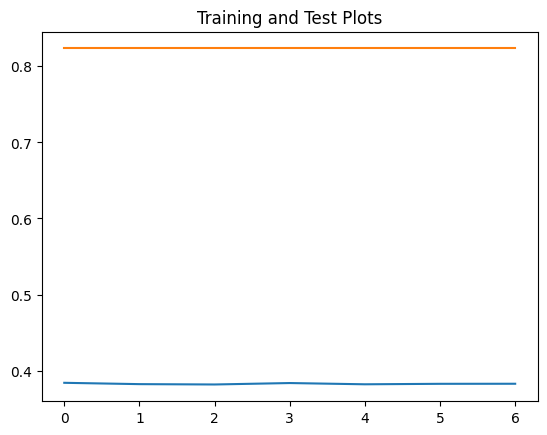

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Training and Test Plots')
ax.plot(range(7), loss_train_history, label="Train Loss")
ax.plot(range(7), accuracy_train_history, label="Train Accuracy")
ax.plot(range(15), loss_test_history, label="Test Loss")
ax.plot(range(15), accuracy_test_history, label="Test Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()